# Plot Fig Sup 1

## Hide or show code

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Toggle on/off the raw code."></form>''')

## Import packages

In [2]:
import matplotlib.pyplot as mp
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import matplotlib.gridspec as gs
import numpy as np
import pickle as pc
from pyabc import History

## Read data

In [3]:
# Load outcome of ABC inference and extract the posterior distribution
# Outcome having used rescaled moments
data_even = History("sqlite:///../data/LV/inference_rel_abund_even.db")
posterior_even = data_even.get_distribution()[0]
# Outcome not having used rescaled moments
data_uneven = History("sqlite:///../data/LV/inference_rel_abund_uneven.db")
posterior_uneven = data_uneven.get_distribution()[0]

# Load true parameter values
with open('../data/LV/simulation_parameters.pickle', 'rb') as f: 
    true_parameters = pc.load(f)

## Plot and save figure

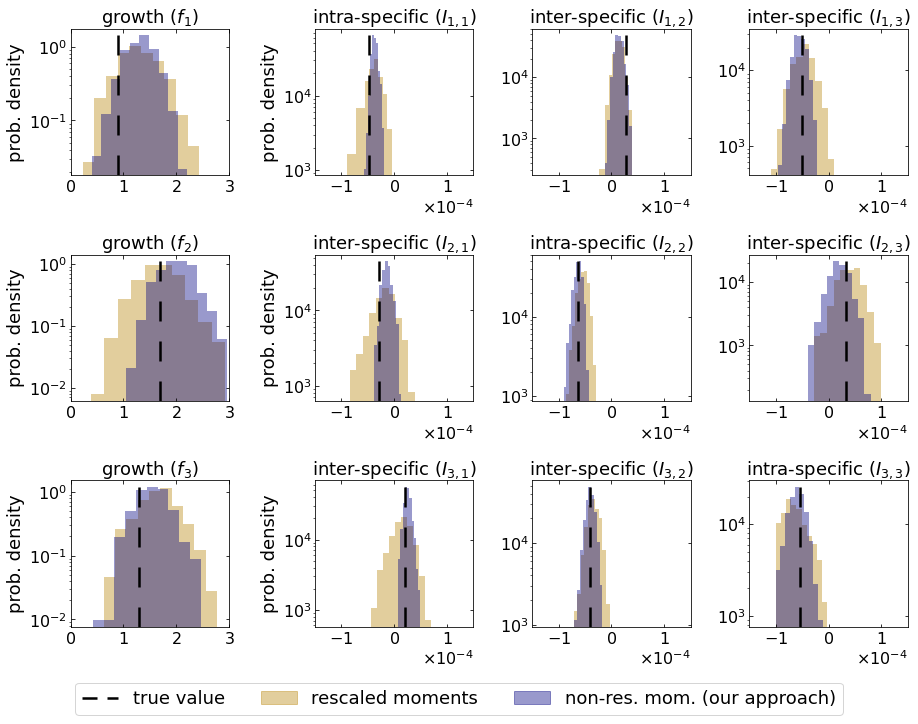

In [4]:
# Make figure (Fig Sup 1)
fig = mp.figure(figsize=(15, 11))

# Create array to build figure panels
gs0 = gs.GridSpec(24, 31, figure=fig)

axA00 = fig.add_subplot(gs0[:6, :6])
axA01 = fig.add_subplot(gs0[9:15, :6])
axA02 = fig.add_subplot(gs0[18:, :6])

axA10 = fig.add_subplot(gs0[:6, 9:15])
axA11 = fig.add_subplot(gs0[9:15, 9:15])
axA12 = fig.add_subplot(gs0[18:, 9:15])

axA20 = fig.add_subplot(gs0[:6, 17:23])
axA21 = fig.add_subplot(gs0[9:15, 17:23])
axA22 = fig.add_subplot(gs0[18:, 17:23])

axA30 = fig.add_subplot(gs0[:6, 25:])
axA31 = fig.add_subplot(gs0[9:15, 25:])
axA32 = fig.add_subplot(gs0[18:, 25:])

# Define panel for each parameter to show
par_loc = {'gR_0': axA00, 'I_0_0': axA10, 'I_0_1': axA20, 'I_0_2': axA30, 
           'gR_1': axA01, 'I_1_0': axA11, 'I_1_1': axA21, 'I_1_2': axA31, 
           'gR_2': axA02, 'I_2_0': axA12, 'I_2_1': axA22, 'I_2_2': axA32}

# Plot posterior distribution of the ABC inference
for par in par_loc.keys():
    # Posterior having used rescaled moments
    par_loc[par].hist(posterior_uneven.loc[:,par], color = 'darkgoldenrod', alpha = 0.4, density=True, bins = 10, log=True)
    # Posterior not having used rescaled moments
    par_loc[par].hist(posterior_even.loc[:,par], color = 'navy', alpha = 0.4, density=True, bins = 10, log=True)

# Plot true value of the parameters
# Growth rates
axA00.axvline(true_parameters['gR'][0],linestyle=(0,(8,8)),color='k',linewidth=2.5)
axA01.axvline(true_parameters['gR'][1],linestyle=(0,(8,8)),color='k',linewidth=2.5)
axA02.axvline(true_parameters['gR'][2],linestyle=(0,(8,8)),color='k',linewidth=2.5)
# Pair-wise interactions
axA10.axvline(true_parameters['I'][0,0],linestyle=(0,(8,8)),color='k',linewidth=2.5)
axA11.axvline(true_parameters['I'][1,0],linestyle=(0,(8,8)),color='k',linewidth=2.5)
axA12.axvline(true_parameters['I'][2,0],linestyle=(0,(8,8)),color='k',linewidth=2.5)

axA20.axvline(true_parameters['I'][0,1],linestyle=(0,(8,8)),color='k',linewidth=2.5)
axA21.axvline(true_parameters['I'][1,1],linestyle=(0,(8,8)),color='k',linewidth=2.5)
axA22.axvline(true_parameters['I'][2,1],linestyle=(0,(8,8)),color='k',linewidth=2.5)

axA30.axvline(true_parameters['I'][0,2],linestyle=(0,(8,8)),color='k',linewidth=2.5)
axA31.axvline(true_parameters['I'][1,2],linestyle=(0,(8,8)),color='k',linewidth=2.5)
axA32.axvline(true_parameters['I'][2,2],linestyle=(0,(8,8)),color='k',linewidth=2.5)

# General setup of the figure panels
for ax in [axA00,axA01,axA02]:
    ax.set_xlim(0,3)

for ax in [axA10,axA11,axA12,axA20,axA21,axA22,axA30,axA31,axA32]:
    ax.set_xlim(-1.5E-4, 1.5E-4)

for ax in [axA00,axA01,axA02,axA10,axA11,axA12,axA20,axA21,axA22,axA30,axA31,axA32]:
    ax.tick_params(axis='both', direction='in',top=True, right=True)
    ax.xaxis.set_tick_params(labelsize=16)
    ax.yaxis.set_tick_params(labelsize=16)
    ax.ticklabel_format(axis='x', style='sci', scilimits=(0,0), useMathText=True)
    ax.xaxis.offsetText.set(size=16)
    
for ax in [axA00,axA01,axA02,axA10,axA11,axA12]:
    ax.set_ylabel("prob. density", fontsize=18)
    
axA00.set_title(r'growth ($f_1$)', fontsize=18)
axA01.set_title(r'growth ($f_2$)', fontsize=18)
axA02.set_title(r'growth ($f_3$)', fontsize=18)

axA10.set_title(r'intra-specific ($I_{1,1}$)', fontsize=18)
axA11.set_title(r'inter-specific ($I_{2,1}$)', fontsize=18)
axA12.set_title(r'inter-specific ($I_{3,1}$)', fontsize=18)

axA20.set_title(r'inter-specific ($I_{1,2}$)', fontsize=18)
axA21.set_title(r'intra-specific ($I_{2,2}$)', fontsize=18)
axA22.set_title(r'inter-specific ($I_{3,2}$)', fontsize=18)

axA30.set_title(r'inter-specific ($I_{1,3}$)', fontsize=18)
axA31.set_title(r'inter-specific ($I_{2,3}$)', fontsize=18)
axA32.set_title(r'intra-specific ($I_{3,3}$)', fontsize=18)

# Make a shared legend for the figure
# True parameter value
true_line = Line2D([0],[0], linestyle=(0,(6,4)), color='k', linewidth=2.5, label='true value')
# Posterior distribution having used rescaled moments
uneven_patch = mpatches.Patch(color = 'darkgoldenrod', alpha = 0.4, label='rescaled moments')
# Posterior distribution not having used rescaled moments
even_patch = mpatches.Patch(color = 'navy', alpha = 0.4, label='non-res. mom. (our approach)')
fig.legend(handles=[true_line,uneven_patch,even_patch], loc='lower center', ncol=3, prop=dict(size=18))

# Save figure
mp.savefig('figsup1.pdf', dpi=300, format='pdf', bbox_inches='tight')